# Critical lines and caustics of the binary lens

The critical lines and caustics of the binary lens are determined by solving numerically the equation

$$
\frac{\partial z_s}{\partial z^*}=e^{i\phi}
$$

for any $\phi \in [0,2\pi]$.

The equation can be turned into a fourth order complex polynomial, of which we shall find the roots:

$$
z^4-z^2(2z_1^{*2}+e^{i\phi})-zz_1^*2(m_1-m_2)e^{i\phi}+z_1^{*2}(z_1^{*2}-e^{i\phi})=0
$$

For each $\phi$ there are up to $4$ roots (critical points). By using the lens equation, these can be mapped on the source plane to derive the caustics:

$$
z_{cau}=z_{crit}-\frac{m_1}{z_{crit}^*-z_1^*}-\frac{m_2}{z_{crit}^*-z_2^*} \;.
$$




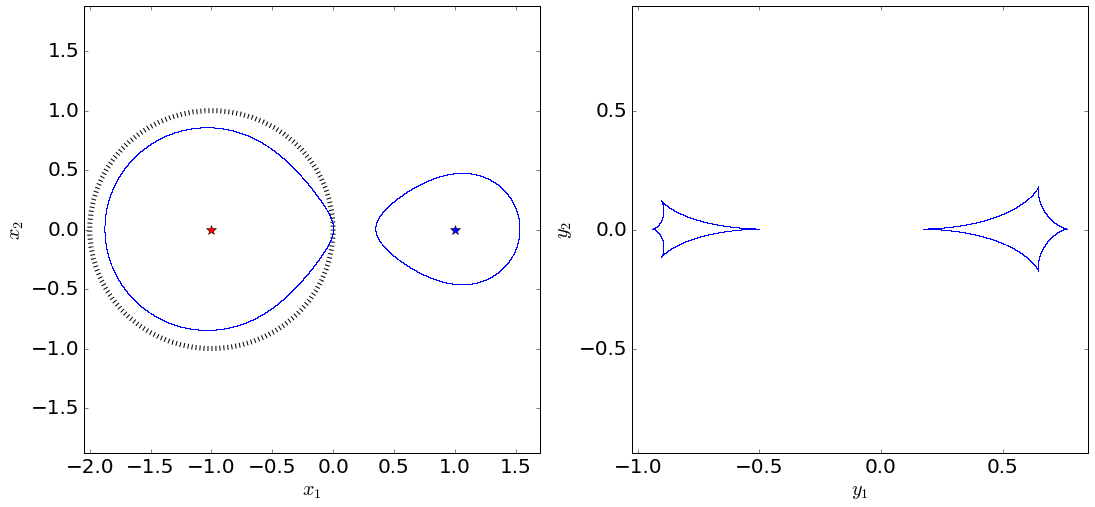

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



# parameters defining the system
q=1.0/3 # mass ratio
d=2.0 # distance between the two masses

# positions of the two lenses (symmetric with respect to the origin and along the x_1 axis)
z_1=complex(d/2.0,0.0)
z_2=-z_1

# (fractional) masses of the two lenses
m2=1.0/(1.0+q)
m1=1.0-m2

# set the phase vector
phi_=np.linspace(0,2.*np.pi,10000)

fig,ax=plt.subplots(1,2,figsize=(18,8))

x=[]
y=[]
xs=[]
ys=[]

# we need to find the roots of our fourth order polynomial for each value of phi
for i in range(phi_.size):
    phi=phi_[i]
    # the coefficients of the complex polynomial
    coefficients = [1.0,0.0,-2*np.conj(z_1)**2-np.exp(1j*phi),-np.conj(z_1)*2*(m1-m2)*np.exp(1j*phi),np.conj(z_1)**2*(np.conj(z_1)**2-np.exp(1j*phi))]
    # use the numpy function roots to find the roots of the polynomial
    z=np.roots(coefficients) # these are the critical points!
    
    # use the lens equation (complex form) to map the critical points on the source plane 
    zs=z-m1/(np.conj(z)-np.conj(z_1))-m2/((np.conj(z)-np.conj(-z_1))) # these are the caustics!
    
    # append critical and caustic points
    x.append(z.real)
    y.append(z.imag)
    xs.append(zs.real)
    ys.append(zs.imag)
    
# plot the results
ax[0].plot(x,y,',',color='blue')
ax[1].plot(xs,ys,',',color='blue')

ax[0].plot([z_1.real],[z_1.imag],'*',markersize=10,color='blue')
ax[0].plot([z_2.real],[z_2.imag],'*',markersize=10,color='red')

# set dimensions of image plane plotting area
xmin=np.amin(x)
xmax=np.amax(x)
ymin=np.amin(y)
ymax=np.amax(y)
dim=[xmax-xmin,ymax-ymin]
if (dim[0]>dim[1]):
    side=dim[0]*1.1
else:
    side=dim[1]*1.1

    
xmin_=0.5*(xmin+xmax)-side/2.0
xmax_=0.5*(xmin+xmax)+side/2.0
ymin_=0.5*(ymin+ymax)-side/2.0
ymax_=0.5*(ymin+ymax)+side/2.0


ax[0].set_xlim([xmin_,xmax_])
ax[0].set_ylim([ymin_,ymax_])

# set dimensions of source plane plotting area
xmin=np.amin(xs)
xmax=np.amax(xs)
ymin=np.amin(ys)
ymax=np.amax(ys)
dim=[xmax-xmin,ymax-ymin]
if (dim[0]>dim[1]):
    side=dim[0]*1.1
else:
    side=dim[1]*1.1

    
xmin_=0.5*(xmin+xmax)-side/2.0
xmax_=0.5*(xmin+xmax)+side/2.0
ymin_=0.5*(ymin+ymax)-side/2.0
ymax_=0.5*(ymin+ymax)+side/2.0

ax[1].set_xlim([xmin_,xmax_])
ax[1].set_ylim([ymin_,ymax_])

ax[0].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)
ax[1].xaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)    

ax[0].set_xlabel('$x_1$',fontsize=20)
ax[0].set_ylabel('$x_2$',fontsize=20)     
ax[1].set_xlabel('$y_1$',fontsize=20)
ax[1].set_ylabel('$y_2$',fontsize=20)

# Plot the Einstein ring of a lens with mass = m1+m2 at the position of m2
circle=plt.Circle((z_2.real,z_2.imag),1.0,color='black',fill=False,ls=':',lw=5)
ax[0].add_artist(circle)

The shape of the critical lines and caustics depends on the mass ratio of the two lenses, $q$, and on their distance $d$. In the following example, we will keep the mass ratio equal to 1 and change the distance between the lenses.

In [3]:
# parameters defining the system
q=1.0 # mass ratio
# (fractional) masses of the two lenses
m2=1.0/(1.0+q)
m1=1.0-m2

d=np.array([0.0,0.2,0.4,0.6,2.0/np.sqrt(8),1.2,1.4,1.6,1.8,2.0,2.2,2.4])#np.linspace(0.0,1.2,4) # distance between the two masses

# set the phase vector
phi_=np.linspace(0,2.*np.pi,10000)



jd=0
for j in range(d.size):

    fig,ax=plt.subplots(1,2,figsize=(16,7))#plt.subplots(d.size,2,figsize=(18,64))
    dstr = "%3.2f" % d[j]
    
    # positions of the two lenses (symmetric with respect to the origin and along the x_1 axis)
    z_1=complex(d[j]/2.0,0.0)
    z_2=-z_1


    x=[]
    y=[]
    xs=[]
    ys=[]
    
    for i in range(phi_.size):
        phi=phi_[i]
        # the coefficients of the complex polynomial
        coefficients = [1.0,0.0,-2*np.conj(z_1)**2-np.exp(1j*phi),-np.conj(z_1)*2*(m1-m2)*np.exp(1j*phi),np.conj(z_1)**2*(np.conj(z_1)**2-np.exp(1j*phi))]
        # use the numpy function roots to find the roots of the polynomial
        z=np.roots(coefficients) # these are the critical points!
    
        # use the lens equation (complex form) to map the critical points on the source plane 
        zs=z-m1/(np.conj(z)-np.conj(z_1))-m2/((np.conj(z)-np.conj(-z_1))) # these are the caustics!
    
        # append critical and caustic points
        x.append(z.real)
        y.append(z.imag)
        xs.append(zs.real)
        ys.append(zs.imag)
    
    # plot the results
    #ax[jd,0].plot(x,y,',',color='blue')
    #ax[jd,1].plot(xs,ys,',',color='blue')
    ax[0].plot(x,y,',',color='blue')
    ax[1].plot(xs,ys,',',color='blue')

    ax[0].plot([z_1.real],[z_1.imag],'*',markersize=10,color='blue')
    ax[0].plot([z_2.real],[z_2.imag],'*',markersize=10,color='red')

    # set dimensions of image plane plotting area
    xmin=np.amin(x)
    xmax=np.amax(x)
    ymin=np.amin(y)
    ymax=np.amax(y)
    dim=[xmax-xmin,ymax-ymin]
    if (dim[0]>dim[1]):
        side=dim[0]*1.1
    else:
        side=dim[1]*1.1

    
    xmin_=0.5*(xmin+xmax)-side/2.0
    xmax_=0.5*(xmin+xmax)+side/2.0
    ymin_=0.5*(ymin+ymax)-side/2.0
    ymax_=0.5*(ymin+ymax)+side/2.0
    
    xmin_=-2.3
    xmax_=2.3
    ymin_=xmin_
    ymax_=xmax_    


    #ax[jd,0].set_xlim([xmin_,xmax_])
    #ax[jd,0].set_ylim([ymin_,ymax_])
    ax[0].set_xlim([xmin_,xmax_])
    ax[0].set_ylim([ymin_,ymax_])

    # set dimensions of source plane plotting area
    xmin=np.amin(xs)
    xmax=np.amax(xs)
    ymin=np.amin(ys)
    ymax=np.amax(ys)
    dim=[xmax-xmin,ymax-ymin]
    if (dim[0]>dim[1]):
        side=dim[0]*1.1
    else:
        side=dim[1]*1.1

    
    xmin_=0.5*(xmin+xmax)-side/2.0
    xmax_=0.5*(xmin+xmax)+side/2.0
    ymin_=0.5*(ymin+ymax)-side/2.0
    ymax_=0.5*(ymin+ymax)+side/2.0
    
    xmin_=-2.3
    xmax_=2.3
    ymin_=xmin_
    ymax_=xmax_

    #ax[j,1].set_xlim([xmin_,xmax_])
    #ax[j,1].set_ylim([ymin_,ymax_])
    ax[1].set_xlim([xmin_,xmax_])
    ax[1].set_ylim([ymin_,ymax_])
    jd=jd+1

    ax[0].xaxis.set_tick_params(labelsize=20)
    ax[0].yaxis.set_tick_params(labelsize=20)
    ax[1].xaxis.set_tick_params(labelsize=20)
    ax[1].yaxis.set_tick_params(labelsize=20)    

    ax[0].set_xlabel('$x_1$',fontsize=20)
    ax[0].set_ylabel('$x_2$',fontsize=20)     
    ax[1].set_xlabel('$y_1$',fontsize=20)
    ax[1].set_ylabel('$y_2$',fontsize=20) 

    ax[0].text(1.8,2,'d='+dstr,horizontalalignment='right',fontsize=20)
    
    fig.savefig('samemass_'+dstr+'.png')
    plt.close()

/Users/massimo/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:38: RuntimeWarning: divide by zero encountered in divide
/Users/massimo/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in divide


Now, we keep the distance fixed and change the mass ratio

In [4]:
# parameters defining the system
q=np.array([1.0,0.5,0.1,0.01,0.001,0.0001]) # mass ratio

# distance between the two masses
d=1.0
# positions of the two lenses (symmetric with respect to the origin and along the x_1 axis)
z_1=complex(d/2.0,0.0)
z_2=-z_1

# set the phase vector
phi_=np.linspace(0,2.*np.pi,10000)



jd=0
for j in range(q.size):
    
    # (fractional) masses of the two lenses
    m2=1.0/(1.0+q[j])
    m1=1.0-m2

    fig,ax=plt.subplots(1,2,figsize=(16,7))#plt.subplots(d.size,2,figsize=(18,64))
    qstr = "%5.4f" % q[j]
    dstr = "%3.2f" % d


    x=[]
    y=[]
    xs=[]
    ys=[]
    
    for i in range(phi_.size):
        phi=phi_[i]
        # the coefficients of the complex polynomial
        coefficients = [1.0,0.0,-2*np.conj(z_1)**2-np.exp(1j*phi),-np.conj(z_1)*2*(m1-m2)*np.exp(1j*phi),np.conj(z_1)**2*(np.conj(z_1)**2-np.exp(1j*phi))]
        # use the numpy function roots to find the roots of the polynomial
        z=np.roots(coefficients) # these are the critical points!
    
        # use the lens equation (complex form) to map the critical points on the source plane 
        zs=z-m1/(np.conj(z)-np.conj(z_1))-m2/((np.conj(z)-np.conj(-z_1))) # these are the caustics!
    
        # append critical and caustic points
        x.append(z.real)
        y.append(z.imag)
        xs.append(zs.real)
        ys.append(zs.imag)
    
    # plot the results
    ax[0].plot(x,y,',',color='blue')
    ax[1].plot(xs,ys,',',color='blue') 
    
    ax[0].plot([z_1.real],[z_1.imag],'*',markersize=10,color='blue')
    ax[0].plot([z_2.real],[z_2.imag],'*',markersize=10,color='red')

    xmin_=-2.3
    xmax_=2.3
    ymin_=xmin_
    ymax_=xmax_    

    ax[0].set_xlim([xmin_,xmax_])
    ax[0].set_ylim([ymin_,ymax_])

    ax[1].set_xlim([xmin_,xmax_])
    ax[1].set_ylim([ymin_,ymax_])
    jd=jd+1

    ax[0].xaxis.set_tick_params(labelsize=20)
    ax[0].yaxis.set_tick_params(labelsize=20)
    ax[1].xaxis.set_tick_params(labelsize=20)
    ax[1].yaxis.set_tick_params(labelsize=20)    

    ax[0].set_xlabel('$x_1$',fontsize=20)
    ax[0].set_ylabel('$x_2$',fontsize=20)     
    ax[1].set_xlabel('$y_1$',fontsize=20)
    ax[1].set_ylabel('$y_2$',fontsize=20) 

    ax[0].text(2,2,'q='+qstr,horizontalalignment='right',fontsize=20)
    ax[0].text(2,1.7,'d='+dstr,horizontalalignment='right',fontsize=20)
    
    fig.savefig('varmass_'+qstr+'_'+dstr+'.png')
    plt.close()

# Multiple images

To find the positions of the images of a source at $z_s$, we can turn the lens equation into a 5-th order complex polynomial and find its roots using the same method used to find the critical points.

The polynomial can be written as:
$$
p_5(z)=\sum_{i=0}^{5}c_i z^i
$$
and, after setting 
$$
\Delta m= \frac{m_1-m_2}{2} \hspace{1cm}  m=\frac{m_1+m_2}{2} \hspace{1cm} z_2=-z_1 \hspace{1cm} z_1=z_1^* \;,
$$
the coefficients turn out to be
$$
c_0=z_1^2[4(\Delta m)^2 z_s+4m\Delta m z_1 +4 \Delta m z_s z_s^* z_1 +2mz_s^*z_1^2+z_sz_s^{*2}z_1^2-2\Delta m z_1^3-z_sz_1^4] \\
c_1=-8m\Delta m z_s z_1 - 4 (\Delta m)^2z_1^2-4m^2z_1^2-4mz_sz_s^*z_1^2-4\Delta m z_s^*z_1^3-z_s^{*2}z_1^4+z_1^6 \\
c_2=4 m^2 z_s+4 m \Delta m z_1 -4 \Delta m z_s z_s^* z_1 -2 z_s z_s^{*2}z_1^2 + 4 \Delta m z_1^3+2z_sz_1^4 \\
c_3 = 4m z_s z_s^*+4 \Delta m z_s^* z_1+2 z_s^{*2}z_1^2-2z_1^4 \\
c_4 = -2mz_s^*+z_sz_s^{*2}-2\Delta m z_1 - z_s z_1^2 \\
c_5 = z_1^2-z_s^{*2}
$$

In [5]:
zs=complex(1.0,1.0)

m=0.5*(m1+m2)
Dm=(m2-m1)/2.0

c5=z_1**2-np.conj(zs)**2
c4=-2*m*np.conj(zs)+zs*np.conj(zs)**2-2*Dm*z_1-zs*z_1**2
c3=4.0*m*zs*np.conj(zs)+4.0*Dm*np.conj(zs)*z_1+2.0*np.conj(zs)**2*z_1**2-2.0*z_1**4
c2=4.0*m**2*zs+4.0*m*Dm*z_1-4.0*Dm*zs*np.conj(zs)*z_1-2.0*zs*np.conj(zs)**2*z_1**2+4.0*Dm*z_1**3+2.0*zs*z_1**4
c1=-8.0*m*Dm*zs*z_1-4.0*Dm**2*z_1**2-4.0*m**2*z_1**2-4.0*m*zs*np.conj(zs)*z_1**2-4.0*Dm*np.conj(zs)*z_1**3-np.conj(zs)**2*z_1**4+z_1**6
c0=z_1**2*(4.0*Dm**2*zs+4.0*m*Dm*z_1+4.0*Dm*zs*np.conj(zs)*z_1+2.0*m*np.conj(zs)*z_1**2+zs*np.conj(zs)**2*z_1**2-2*Dm*z_1**3-zs*z_1**4)
coefficients=[c5,c4,c3,c2,c1,c0]

images=np.roots(coefficients)

print images

[ 1.26236366 +1.52467118e+00j -0.50004000 -7.99804808e-05j
 -0.49999775 -7.64055360e-05j  0.23761881 -5.24634324e-01j
  0.03852298 -3.07622003e-01j]


We can visualize an example. Let's consider a binary lens with $q=1$ and $d=1$.

Image positions:
Image # 1 pos= (-0.399461772936+2.37655910503j) dzs= 2.18337970786
Image # 2 pos= (-0.88210700626-0.850598744496j) dzs= 3.55444797897e-16
Image # 3 pos= (0.953110491325+0.136219003883j) dzs= 2.15441202326e-15
Image # 4 pos= (-0.460765045396+0.194040180141j) dzs= 2.18337970786
Image # 5 pos= (-0.0813649020273+0.0614275142695j) dzs= 1.57009245868e-16


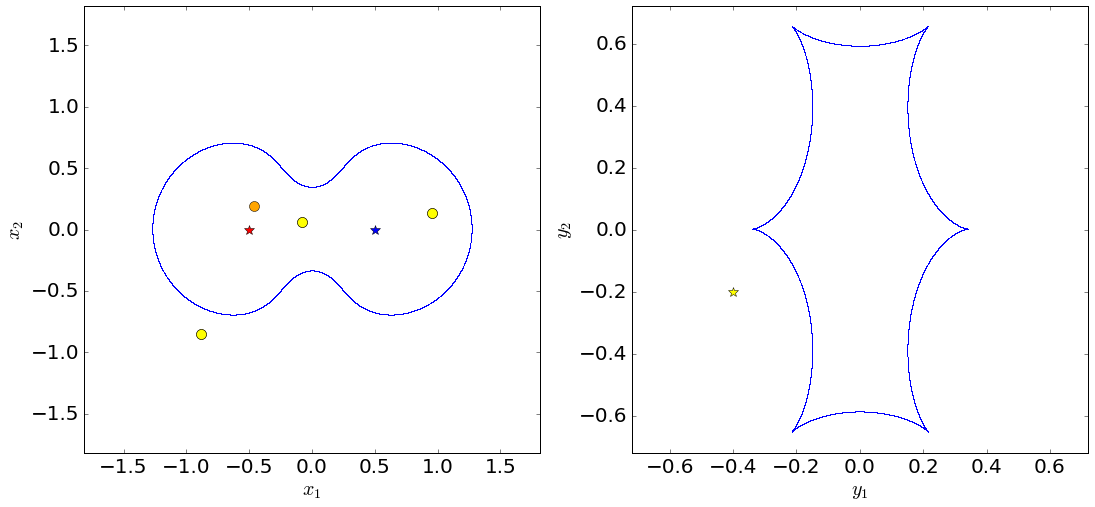

In [14]:
# parameters defining the system
q=1.0 # mass ratio
d=1.0 # distance between the two masses

# positions of the two lenses (symmetric with respect to the origin and along the x_1 axis)
z_1=complex(d/2.0,0.0)
z_2=-z_1

# (fractional) masses of the two lenses
m2=1.0/(1.0+q)
m1=1.0-m2

# set the phase vector
phi_=np.linspace(0,2.*np.pi,10000)

fig,ax=plt.subplots(1,2,figsize=(18,8))

x=[]
y=[]
xs=[]
ys=[]

# we need to find the roots of our fourth order polynomial for each value of phi
for i in range(phi_.size):
    phi=phi_[i]
    # the coefficients of the complex polynomial
    coefficients = [1.0,0.0,-2*np.conj(z_1)**2-np.exp(1j*phi),-np.conj(z_1)*2*(m1-m2)*np.exp(1j*phi),np.conj(z_1)**2*(np.conj(z_1)**2-np.exp(1j*phi))]
    # use the numpy function roots to find the roots of the polynomial
    z=np.roots(coefficients) # these are the critical points!
    
    # use the lens equation (complex form) to map the critical points on the source plane 
    zss=z-m1/(np.conj(z)-np.conj(z_1))-m2/((np.conj(z)-np.conj(-z_1))) # these are the caustics!
    
    # append critical and caustic points
    x.append(z.real)
    y.append(z.imag)
    xs.append(zss.real)
    ys.append(zss.imag)
    
# plot the results
ax[0].plot(x,y,',',color='blue')
ax[1].plot(xs,ys,',',color='blue')

ax[0].plot([z_1.real],[z_1.imag],'*',markersize=10,color='blue')
ax[0].plot([z_2.real],[z_2.imag],'*',markersize=10,color='red')

# set dimensions of image plane plotting area
xmin=np.amin(x)
xmax=np.amax(x)
ymin=np.amin(y)
ymax=np.amax(y)
dim=[xmax-xmin,ymax-ymin]
if (dim[0]>dim[1]):
    side=dim[0]*1.1
else:
    side=dim[1]*1.1

    
xmin_=0.5*(xmin+xmax)-1.3*side/2.0
xmax_=0.5*(xmin+xmax)+1.3*side/2.0
ymin_=0.5*(ymin+ymax)-1.3*side/2.0
ymax_=0.5*(ymin+ymax)+1.3*side/2.0


ax[0].set_xlim([xmin_,xmax_])
ax[0].set_ylim([ymin_,ymax_])

# set dimensions of source plane plotting area
xmin=np.amin(xs)
xmax=np.amax(xs)
ymin=np.amin(ys)
ymax=np.amax(ys)
dim=[xmax-xmin,ymax-ymin]
if (dim[0]>dim[1]):
    side=dim[0]*1.1
else:
    side=dim[1]*1.1

    
xmin_=0.5*(xmin+xmax)-side/2.0
xmax_=0.5*(xmin+xmax)+side/2.0
ymin_=0.5*(ymin+ymax)-side/2.0
ymax_=0.5*(ymin+ymax)+side/2.0

ax[1].set_xlim([xmin_,xmax_])
ax[1].set_ylim([ymin_,ymax_])

ax[0].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)
ax[1].xaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)    

ax[0].set_xlabel('$x_1$',fontsize=20)
ax[0].set_ylabel('$x_2$',fontsize=20)     
ax[1].set_xlabel('$y_1$',fontsize=20)
ax[1].set_ylabel('$y_2$',fontsize=20)


## NOW PLOTTING THE IMAGES AND THE SOURCE

zs=complex(-0.4,-0.2) # source outside the caustic

#zs=complex(-0.1,-0.2) # source inside the caustic

m=0.5*(m1+m2)
Dm=(m2-m1)/2.0

c5=z_1**2-np.conj(zs)**2
c4=-2*m*np.conj(zs)+zs*np.conj(zs)**2-2*Dm*z_1-zs*z_1**2
c3=4.0*m*zs*np.conj(zs)+4.0*Dm*np.conj(zs)*z_1+2.0*np.conj(zs)**2*z_1**2-2.0*z_1**4
c2=4.0*m**2*zs+4.0*m*Dm*z_1-4.0*Dm*zs*np.conj(zs)*z_1-2.0*zs*np.conj(zs)**2*z_1**2+4.0*Dm*z_1**3+2.0*zs*z_1**4
c1=-8.0*m*Dm*zs*z_1-4.0*Dm**2*z_1**2-4.0*m**2*z_1**2-4.0*m*zs*np.conj(zs)*z_1**2-4.0*Dm*np.conj(zs)*z_1**3-np.conj(zs)**2*z_1**4+z_1**6
c0=z_1**2*(4.0*Dm**2*zs+4.0*m*Dm*z_1+4.0*Dm*zs*np.conj(zs)*z_1+2.0*m*np.conj(zs)*z_1**2+zs*np.conj(zs)**2*z_1**2-2*Dm*z_1**3-zs*z_1**4)

coefficients=[c5,c4,c3,c2,c1,c0]

images=np.roots(coefficients)

print 'Image positions:'
deltazs=zs-(images-m1/(np.conj(images)-np.conj(z_1))-m2/(np.conj(images)-np.conj(z_2)))
for i in range(images.size):
    print 'Image #',i+1,'pos=',images[i],'dzs=',np.abs(deltazs[i])
    


ys1=[zs.real]
ys2=[zs.imag]

ax[1].plot(ys1,ys2,'*',markersize=10,color='yellow')
ax[0].plot([images.real],[images.imag],'o',markersize=10,color='orange')
ax[0].plot([images.real[np.abs(deltazs)<1e-3]],[images.imag[np.abs(deltazs)<1e-3]],'o',markersize=10,color='yellow')


# Source in motion with respect to the lens

We can now determine the image configurations for sources in relative motion with respect to the lens:

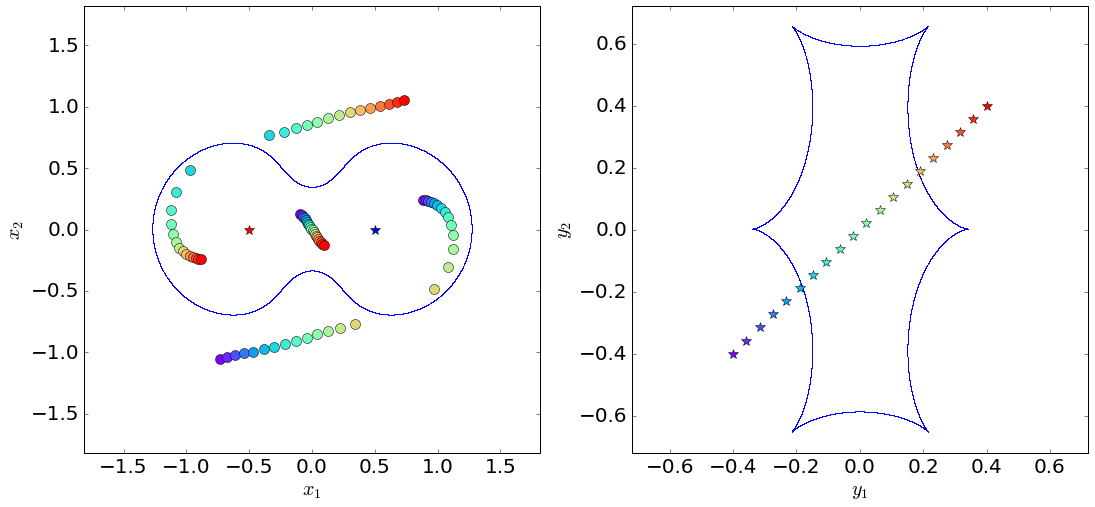

In [15]:
from matplotlib.pyplot import cm 

# replot the critical lines and the caustics:

fig,ax=plt.subplots(1,2,figsize=(18,8))
ax[0].plot(x,y,',',color='blue')
ax[1].plot(xs,ys,',',color='blue')

ax[0].plot([z_1.real],[z_1.imag],'*',markersize=10,color='blue')
ax[0].plot([z_2.real],[z_2.imag],'*',markersize=10,color='red')

# set dimensions of image plane plotting area
xmin=np.amin(x)
xmax=np.amax(x)
ymin=np.amin(y)
ymax=np.amax(y)
dim=[xmax-xmin,ymax-ymin]
if (dim[0]>dim[1]):
    side=dim[0]*1.1
else:
    side=dim[1]*1.1

    
xmin_=0.5*(xmin+xmax)-1.3*side/2.0
xmax_=0.5*(xmin+xmax)+1.3*side/2.0
ymin_=0.5*(ymin+ymax)-1.3*side/2.0
ymax_=0.5*(ymin+ymax)+1.3*side/2.0


ax[0].set_xlim([xmin_,xmax_])
ax[0].set_ylim([ymin_,ymax_])

# set dimensions of source plane plotting area
xmin=np.amin(xs)
xmax=np.amax(xs)
ymin=np.amin(ys)
ymax=np.amax(ys)
dim=[xmax-xmin,ymax-ymin]
if (dim[0]>dim[1]):
    side=dim[0]*1.1
else:
    side=dim[1]*1.1

    
xmin_=0.5*(xmin+xmax)-side/2.0
xmax_=0.5*(xmin+xmax)+side/2.0
ymin_=0.5*(ymin+ymax)-side/2.0
ymax_=0.5*(ymin+ymax)+side/2.0

ax[1].set_xlim([xmin_,xmax_])
ax[1].set_ylim([ymin_,ymax_])

ax[0].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)
ax[1].xaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)    

ax[0].set_xlabel('$x_1$',fontsize=20)
ax[0].set_ylabel('$x_2$',fontsize=20)     
ax[1].set_xlabel('$y_1$',fontsize=20)
ax[1].set_ylabel('$y_2$',fontsize=20)

## NOW PLOTTING THE IMAGES AND THE SOURCE FOR MANY SOURCE POSITIONS

zs_real=np.linspace(-0.4,0.4,20)

color=iter(cm.rainbow(np.linspace(0,1,zs_real.size)))

for i in range(zs_real.size):
    c=next(color)
    zs=complex(zs_real[i],zs_real[i]) 

    m=0.5*(m1+m2)
    Dm=(m2-m1)/2.0

    c5=z_1**2-np.conj(zs)**2
    c4=-2*m*np.conj(zs)+zs*np.conj(zs)**2-2*Dm*z_1-zs*z_1**2
    c3=4.0*m*zs*np.conj(zs)+4.0*Dm*np.conj(zs)*z_1+2.0*np.conj(zs)**2*z_1**2-2.0*z_1**4
    c2=4.0*m**2*zs+4.0*m*Dm*z_1-4.0*Dm*zs*np.conj(zs)*z_1-2.0*zs*np.conj(zs)**2*z_1**2+4.0*Dm*z_1**3+2.0*zs*z_1**4
    c1=-8.0*m*Dm*zs*z_1-4.0*Dm**2*z_1**2-4.0*m**2*z_1**2-4.0*m*zs*np.conj(zs)*z_1**2-4.0*Dm*np.conj(zs)*z_1**3-np.conj(zs)**2*z_1**4+z_1**6
    c0=z_1**2*(4.0*Dm**2*zs+4.0*m*Dm*z_1+4.0*Dm*zs*np.conj(zs)*z_1+2.0*m*np.conj(zs)*z_1**2+zs*np.conj(zs)**2*z_1**2-2*Dm*z_1**3-zs*z_1**4)

    coefficients=[c5,c4,c3,c2,c1,c0]

    images=np.roots(coefficients)

    deltazs=zs-(images-m1/(np.conj(images)-np.conj(z_1))-m2/(np.conj(images)-np.conj(z_2)))

    ys1=[zs.real]
    ys2=[zs.imag]

    ax[1].plot(ys1,ys2,'*',markersize=10,c=c)
    ax[0].plot([images.real[np.abs(deltazs)<1e-3]],[images.imag[np.abs(deltazs)<1e-3]],'o',markersize=10,c=c)


# Magnification

As in the case of microlensing by single lenses, multiple images remain undetected and the binary microlensing can be revealed only by means of the magnification effects (photometric and astrometric microlensing).

The magnification of each image can be computed using the formula:
$$
\det A = 1-\left|\sum_{i=1}^{2}\frac{m_i}{(z^*-z_i^*)^2}\right|
$$
remembering that $\mu=\det A^{-1}$.

In [16]:
def detA(m1,m2,z1,z2,z):
    deta=1-np.abs(m1/(np.conj(z)-np.conj(z_1))**2+m2/(np.conj(z)-np.conj(z_2))**2)
    return(deta)
    
def findImages(m1,m2,zs):
    m=0.5*(m1+m2)
    Dm=0.5*(m2-m1)
    
    c5=z_1**2-np.conj(zs)**2
    c4=-2*m*np.conj(zs)+zs*np.conj(zs)**2-2*Dm*z_1-zs*z_1**2
    c3=4.0*m*zs*np.conj(zs)+4.0*Dm*np.conj(zs)*z_1+2.0*np.conj(zs)**2*z_1**2-2.0*z_1**4
    c2=4.0*m**2*zs+4.0*m*Dm*z_1-4.0*Dm*zs*np.conj(zs)*z_1-2.0*zs*np.conj(zs)**2*z_1**2+4.0*Dm*z_1**3+2.0*zs*z_1**4
    c1=-8.0*m*Dm*zs*z_1-4.0*Dm**2*z_1**2-4.0*m**2*z_1**2-4.0*m*zs*np.conj(zs)*z_1**2-4.0*Dm*np.conj(zs)*z_1**3-np.conj(zs)**2*z_1**4+z_1**6
    c0=z_1**2*(4.0*Dm**2*zs+4.0*m*Dm*z_1+4.0*Dm*zs*np.conj(zs)*z_1+2.0*m*np.conj(zs)*z_1**2+zs*np.conj(zs)**2*z_1**2-2*Dm*z_1**3-zs*z_1**4)
    coefficients=[c5,c4,c3,c2,c1,c0]

    images=np.roots(coefficients)
    deltazs=zs-(images-m1/(np.conj(images)-np.conj(z_1))-m2/(np.conj(images)-np.conj(z_2)))
    return(images[np.abs(deltazs)<1e-3])
    

# re-define the source and calculate the images:

zs=complex(0.4,0)


# note the lens properties where specified earlier.

images=findImages(m1,m2,zs)
mu=1.0/detA(m1,m2,z_1,z_2,images)

for i in range(mu.size):
    print 'image #',i+1,'mu=',mu[i]
print 'Total magnification:',np.abs(mu).sum()


# let's calculate a luminosity curve

image # 1 mu= -0.714402372266
image # 2 mu= 14.8208244482
image # 3 mu= -0.302324764794
Total magnification: 15.8375515853


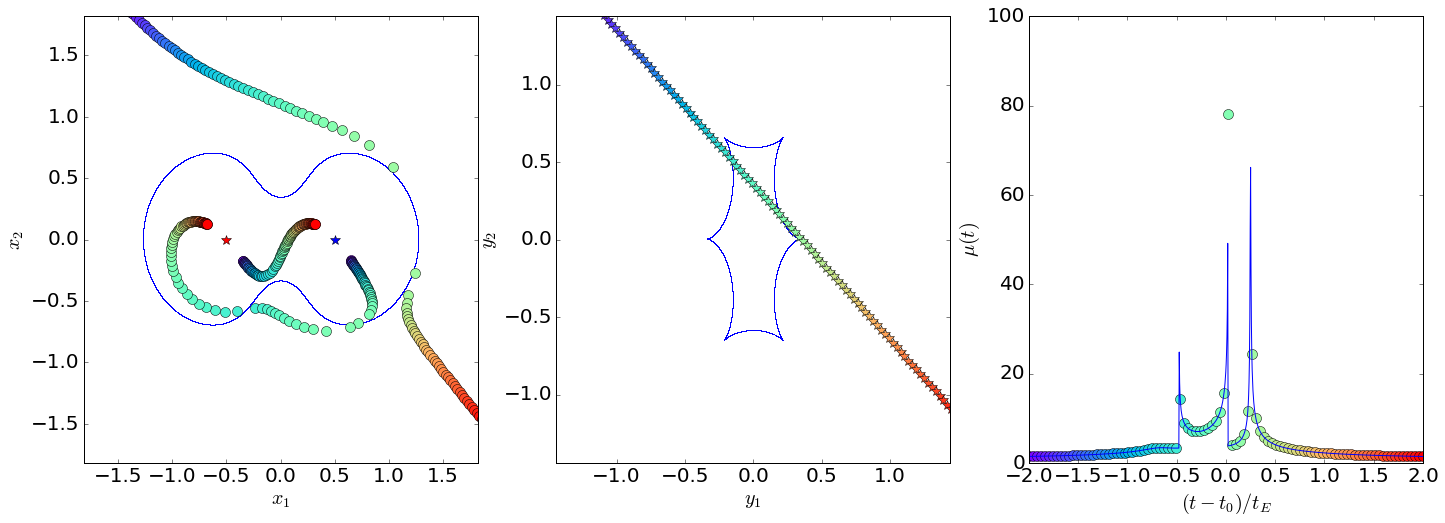

In [17]:
# replot the critical lines and the caustics:

fig,ax=plt.subplots(1,3,figsize=(24,8))
ax[0].plot(x,y,',',color='blue')
ax[1].plot(xs,ys,',',color='blue')

ax[0].plot([z_1.real],[z_1.imag],'*',markersize=10,color='blue')
ax[0].plot([z_2.real],[z_2.imag],'*',markersize=10,color='red')

# set dimensions of image plane plotting area
xmin=np.amin(x)
xmax=np.amax(x)
ymin=np.amin(y)
ymax=np.amax(y)
dim=[xmax-xmin,ymax-ymin]
if (dim[0]>dim[1]):
    side=dim[0]*1.1
else:
    side=dim[1]*1.1

    
xmin_=0.5*(xmin+xmax)-1.3*side/2.0
xmax_=0.5*(xmin+xmax)+1.3*side/2.0
ymin_=0.5*(ymin+ymax)-1.3*side/2.0
ymax_=0.5*(ymin+ymax)+1.3*side/2.0


ax[0].set_xlim([xmin_,xmax_])
ax[0].set_ylim([ymin_,ymax_])

# set dimensions of source plane plotting area
xmin=np.amin(xs)
xmax=np.amax(xs)
ymin=np.amin(ys)
ymax=np.amax(ys)
dim=[xmax-xmin,ymax-ymin]
if (dim[0]>dim[1]):
    side=dim[0]*1.1
else:
    side=dim[1]*1.1

    
xmin_=0.5*(xmin+xmax)-2.0*side/2.0
xmax_=0.5*(xmin+xmax)+2.0*side/2.0
ymin_=0.5*(ymin+ymax)-2.0*side/2.0
ymax_=0.5*(ymin+ymax)+2.0*side/2.0

ax[1].set_xlim([xmin_,xmax_])
ax[1].set_ylim([ymin_,ymax_])

ax[0].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)
ax[1].xaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)    

ax[0].set_xlabel('$x_1$',fontsize=20)
ax[0].set_ylabel('$x_2$',fontsize=20)     
ax[1].set_xlabel('$y_1$',fontsize=20)
ax[1].set_ylabel('$y_2$',fontsize=20)

# redefine the source positions

def zcomplex(y0,p,theta):
    zreal=np.cos(theta)*p+np.sin(theta)*y0
    zimag=-np.sin(theta)*p+np.cos(theta)*y0
    z=complex(zreal,zimag)
    return(z)
    

p=np.linspace(-2,2,100)
theta=np.pi/4
y0=0.25

color=iter(cm.rainbow(np.linspace(0,1,p.size)))
for i in range(p.size):
    c=next(color)
    zs=zcomplex(y0,p[i],theta)
    ys1=[zs.real]
    ys2=[zs.imag]

    ax[1].plot(ys1,ys2,'*',markersize=10,c=c)
    
    
    images=findImages(m1,m2,zs)
    mu=1.0/detA(m1,m2,z_1,z_2,images)

    ax[2].plot([p[i]],[np.abs(mu).sum()],'o',markersize=10,c=c)
    ax[0].plot([images.real],[images.imag],'o',markersize=10,c=c)
    
    
p=np.linspace(np.amin(p),np.amax(p),1000)
mu_=[]
for i in range(p.size):
    zs=zcomplex(y0,p[i],theta)
    ys1=[zs.real]
    ys2=[zs.imag]
    images=findImages(m1,m2,zs)
    mu=1.0/detA(m1,m2,z_1,z_2,images)
    mu_.append(np.abs(mu).sum())
    
ax[2].plot(p,mu_,'-')    
ax[2].set_ylim([0.0,100])

ax[2].xaxis.set_tick_params(labelsize=20)
ax[2].yaxis.set_tick_params(labelsize=20)
ax[2].set_xlabel('$(t-t_0)/t_E$',fontsize=20)
ax[2].set_ylabel('$\mu(t)$',fontsize=20)
